# Data Cleanup

In [5]:
data_text = """VAR1 VAR2 CLASS
1.713 1.586 0
0.180 1.786 1
0.353 1.240 1
0.940 1.566 0
1.486 0.759 1
1.266 1.106 0
1.540 0.419 1
0.459 1.799 1
0.773 0.186 1"""    

In [6]:
print("abc\t123")

abc	123


In [7]:
ls_data = []

for line in data_text.split('\n'):
    ls_data.append(line.split(' '))

ls_data

[['VAR1', 'VAR2', 'CLASS'],
 ['1.713', '1.586', '0'],
 ['0.180', '1.786', '1'],
 ['0.353', '1.240', '1'],
 ['0.940', '1.566', '0'],
 ['1.486', '0.759', '1'],
 ['1.266', '1.106', '0'],
 ['1.540', '0.419', '1'],
 ['0.459', '1.799', '1'],
 ['0.773', '0.186', '1']]

## Analysis

In [8]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline

In [9]:
data1 = pd.DataFrame(ls_data[1:], columns=ls_data[0])
data1

,VAR1,VAR2,CLASS
0,1.713,1.586,0
1,0.180,1.786,1
2,0.353,1.240,1
3,0.940,1.566,0
4,1.486,0.759,1
5,1.266,1.106,0
6,1.540,0.419,1
7,0.459,1.799,1
8,0.773,0.186,1


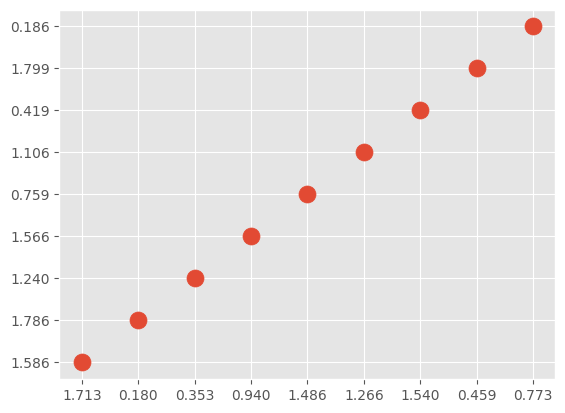

In [10]:
plt.scatter(data1['VAR1'], data1['VAR2'], s=150)

In [11]:
x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]

data = pd.DataFrame({'x': x, 'y': y})

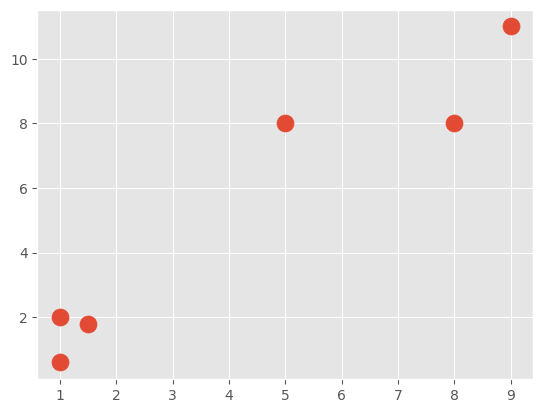

In [12]:
plt.scatter(x, y, s=150)

In [13]:
kmeans = KMeans(n_clusters=2).fit(data)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[1.16666667 1.46666667]
 [7.33333333 9.        ]]
[0 1 0 1 0 1]


c:\Users\psg44\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


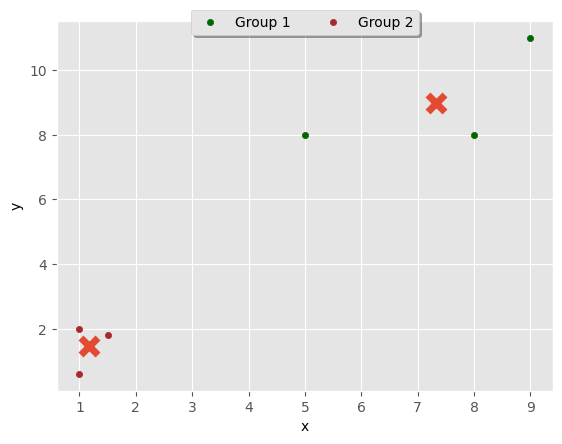

In [14]:
data['labels'] = labels

#plt.plot(data, colors[data['labels'], markersize = 10)

group1 = data[data['labels']==1].plot( kind='scatter', x='x', y='y', color='DarkGreen', label="Group 1" )
group2 = data[data['labels']==0].plot( kind='scatter', x='x', y='y', color='Brown', ax=group1, label="Group 2" )
group1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()